##  Predictive Analytics Project

Yahoo Finance API

In [13]:
# Import necessary library
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Importing necessary library
import yfinance as yf

# Define the ticker symbol
tickerSymbol = 'AAPL'

# Get data on this ticker
tickerData = yf.Ticker(tickerSymbol)

# Get the historical prices for this ticker
tickerDf = tickerData.history(period='1d', start='2022-01-01', end='2023-10-01')

# See your data
print(tickerDf)

                                 Open        High         Low       Close  \
Date                                                                        
2022-01-03 00:00:00-05:00  176.052746  181.052279  175.933951  180.190964   
2022-01-04 00:00:00-05:00  180.804793  181.111693  177.329863  177.904068   
2022-01-05 00:00:00-05:00  177.814959  178.369360  172.894629  173.171829   
2022-01-06 00:00:00-05:00  170.974038  173.548059  169.924634  170.281036   
2022-01-07 00:00:00-05:00  171.162116  172.399623  169.320704  170.449310   
...                               ...         ...         ...         ...   
2023-09-25 00:00:00-04:00  174.199997  176.970001  174.149994  176.080002   
2023-09-26 00:00:00-04:00  174.820007  175.199997  171.660004  171.960007   
2023-09-27 00:00:00-04:00  172.619995  173.039993  169.050003  170.429993   
2023-09-28 00:00:00-04:00  169.339996  172.029999  167.619995  170.690002   
2023-09-29 00:00:00-04:00  172.020004  173.070007  170.339996  171.210007   

###### Alpha Vantage API:

In [3]:
# # Importing necessary library
# import requests

# # Define the API key and endpoint
# api_key = 'your_api_key_here'
# symbol = 'AAPL'
# base_url = f'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol={symbol}&apikey={api_key}'

# # Make the API call
# response = requests.get(base_url)
# data = response.json()

# # See your data
# print(data)

In [7]:
tickerDf.sample(3)

data = tickerDf

### Data Preprocessing

In [11]:
# Convert the 'Date' index to datetime
data.index = pd.to_datetime(data.index)

# Check for missing values
print(data.isnull().sum())

# Calculate moving averages
data['SMA_10'] = data['Close'].rolling(window=10, min_periods=1).mean()
data['SMA_30'] = data['Close'].rolling(window=30, min_periods=1).mean()

Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64


#### Exploratory Data Analysis (EDA)

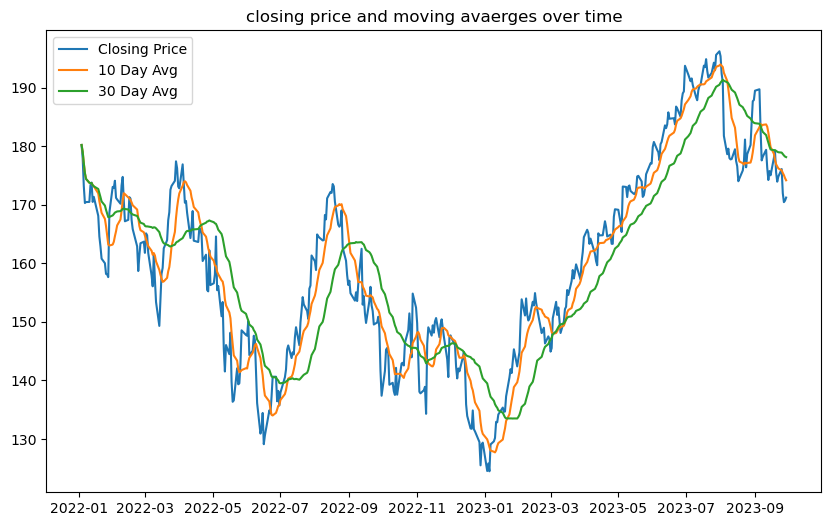

In [15]:
# Plotting
plt.figure(figsize=(10,6))
plt.plot(data['Close'], label='Closing Price')
plt.plot(data['SMA_10'], label='10 Day Avg')
plt.plot(data['SMA_30'], label='30 Day Avg')
plt.title("closing price and moving avaerges over time")
plt.legend()
plt.show()

  Plot the closing prices and moving averages over time to understand the trends.

#### Normalization or Standardization

In [18]:
# Standardize the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_standardized = pd.DataFrame(scaler.fit_transform(data), columns=data.columns, index=data.index)

##### Visualize the closing prices over time to see the overall trend

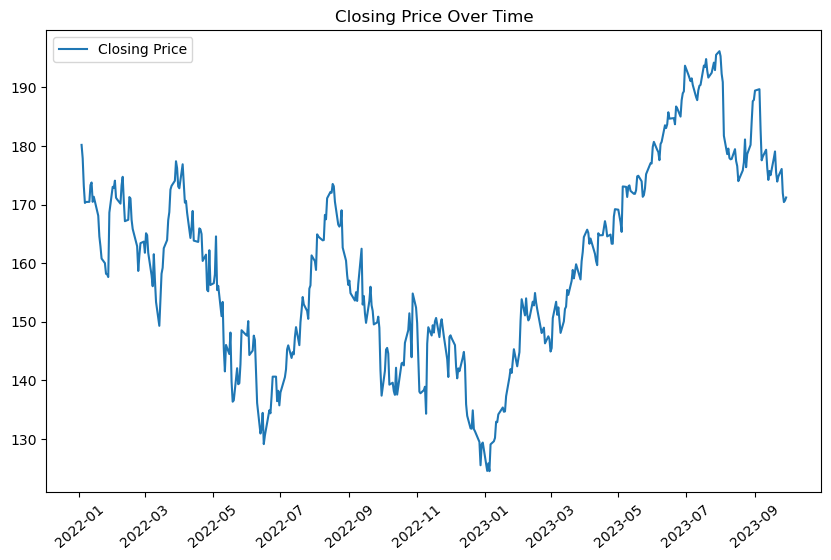

In [21]:
# Plotting the closing prices
plt.figure(figsize=(10,6))
plt.plot(data['Close'], label='Closing Price')
plt.title('Closing Price Over Time')
plt.legend()
plt.xticks(rotation = 40)
plt.show()


#### Plotting Moving Averages

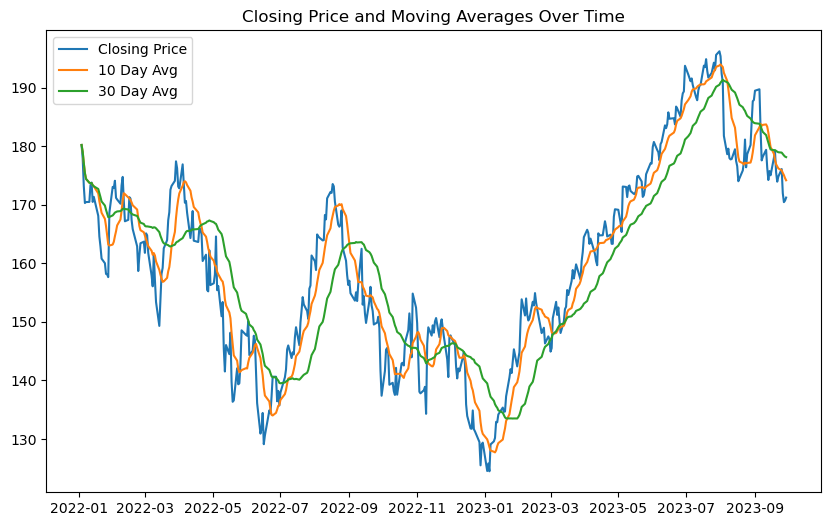

In [22]:
# Plotting the closing prices along with moving averages
plt.figure(figsize=(10,6))
plt.plot(data['Close'], label='Closing Price')
plt.plot(data['SMA_10'], label='10 Day Avg')
plt.plot(data['SMA_30'], label='30 Day Avg')
plt.title('Closing Price and Moving Averages Over Time')
plt.legend()
plt.show()

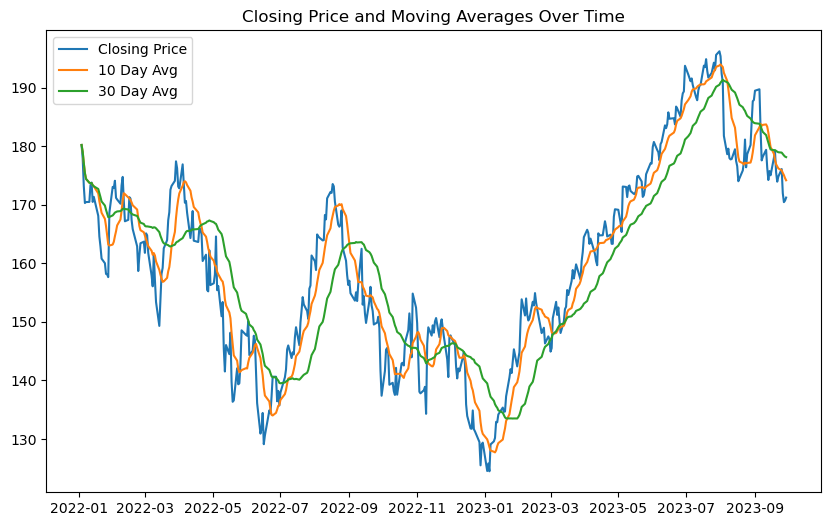

In [23]:
# Plotting the closing prices along with moving averages
plt.figure(figsize=(10,6))
plt.plot(data['Close'], label='Closing Price')
plt.plot(data['SMA_10'], label='10 Day Avg')
plt.plot(data['SMA_30'], label='30 Day Avg')
plt.title('Closing Price and Moving Averages Over Time')
plt.legend()
plt.show()

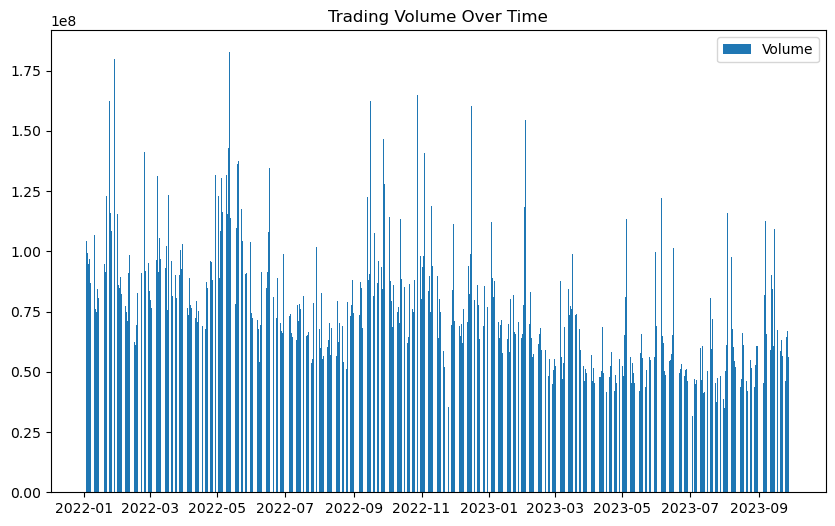

In [24]:
# Plotting the trading volume
plt.figure(figsize=(10,6))
plt.bar(data.index, data['Volume'], label='Volume')
plt.title('Trading Volume Over Time')
plt.legend()
plt.show()

#### Correlation Analysis

In [25]:
# Calculating the correlation matrix
correlation_matrix = data.corr()
print(correlation_matrix)


                  Open      High       Low     Close    Volume  Dividends  \
Open          1.000000  0.995981  0.995754  0.988862 -0.350694   0.011964   
High          0.995981  1.000000  0.995896  0.995186 -0.324055   0.011316   
Low           0.995754  0.995896  1.000000  0.995791 -0.382432   0.009706   
Close         0.988862  0.995186  0.995791  1.000000 -0.352952   0.012524   
Volume       -0.350694 -0.324055 -0.382432 -0.352952  1.000000   0.008919   
Dividends     0.011964  0.011316  0.009706  0.012524  0.008919   1.000000   
Stock Splits       NaN       NaN       NaN       NaN       NaN        NaN   
SMA_10        0.968690  0.967146  0.962491  0.958550 -0.278460   0.018567   
SMA_30        0.880304  0.881248  0.868467  0.867625 -0.145247   0.006948   

              Stock Splits    SMA_10    SMA_30  
Open                   NaN  0.968690  0.880304  
High                   NaN  0.967146  0.881248  
Low                    NaN  0.962491  0.868467  
Close                  NaN  0.958

#### Distribution Analysis

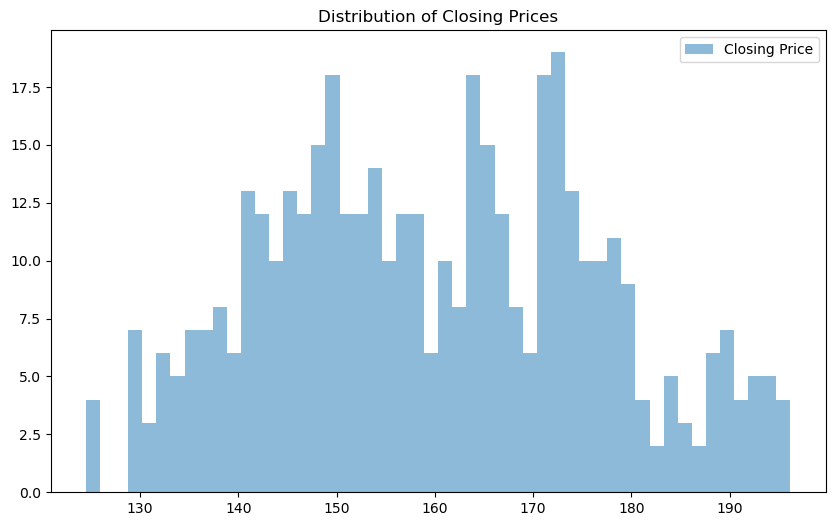

In [26]:
# Plotting the distribution of closing prices
plt.figure(figsize=(10,6))
plt.hist(data['Close'], bins=50, alpha=0.5, label='Closing Price')
plt.title('Distribution of Closing Prices')
plt.legend()
plt.show()

## Feature Engineering and Selection

##### Creating New Features

In [27]:
# Example: Calculating the Relative Strength Index (RSI)
def calculate_rsi(data, window):
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0))
    loss = (-delta.where(delta < 0, 0))
    avg_gain = gain.rolling(window=window, min_periods=1).mean()
    avg_loss = loss.rolling(window=window, min_periods=1).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

data['RSI'] = calculate_rsi(data, window=14)

#### Selecting Relevant Features

In [28]:
# Selecting the features
features = ['Open', 'High', 'Low', 'Close', 'Volume', 'SMA_10', 'SMA_30', 'RSI']
data_selected = data[features]

#### Checking Feature Correlations

In [29]:
# Calculating the correlation matrix
correlation_matrix = data_selected.corr()
print(correlation_matrix)

            Open      High       Low     Close    Volume    SMA_10    SMA_30  \
Open    1.000000  0.995981  0.995754  0.988862 -0.350694  0.968690  0.880304   
High    0.995981  1.000000  0.995896  0.995186 -0.324055  0.967146  0.881248   
Low     0.995754  0.995896  1.000000  0.995791 -0.382432  0.962491  0.868467   
Close   0.988862  0.995186  0.995791  1.000000 -0.352952  0.958550  0.867625   
Volume -0.350694 -0.324055 -0.382432 -0.352952  1.000000 -0.278460 -0.145247   
SMA_10  0.968690  0.967146  0.962491  0.958550 -0.278460  1.000000  0.938505   
SMA_30  0.880304  0.881248  0.868467  0.867625 -0.145247  0.938505  1.000000   
RSI     0.213528  0.223226  0.245659  0.256026 -0.348612  0.063972 -0.180630   

             RSI  
Open    0.213528  
High    0.223226  
Low     0.245659  
Close   0.256026  
Volume -0.348612  
SMA_10  0.063972  
SMA_30 -0.180630  
RSI     1.000000  


#### Feature Scaling

In [30]:
# Standardizing the selected features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_standardized = pd.DataFrame(scaler.fit_transform(data_selected), columns=features, index=data_selected.index)

### Splitting the Data

In [50]:
# Dropping rows with NaN values from both X and y
X.dropna(inplace=True)
y = y.loc[X.index]  # Ensures y has the same indices as X

C:\Users\Admin\AppData\Local\Temp\ipykernel_10484\2203134183.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.dropna(inplace=True)


In [53]:
# Importing necessary library
from sklearn.model_selection import train_test_split

# Shifting the 'Close' column to create the target variable y
y = data['Close'].shift(-1)

# Dropping the last row from both X and y as there's no corresponding target value for it
X = data_standardized[:-1]
y = y[:-1]

# Now drop any remaining rows with NaN values from both X and y
X.dropna(inplace=True)
y = y.loc[X.index]  # Ensures y has the same indices as X

# Now proceed to split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


C:\Users\Admin\AppData\Local\Temp\ipykernel_10484\2176254919.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.dropna(inplace=True)


In [54]:
X.isna().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
SMA_10    0
SMA_30    0
RSI       0
dtype: int64

### Training the Model

In [55]:
# Example using Linear Regression
from sklearn.linear_model import LinearRegression

# Creating the model
model = LinearRegression()

# Training the model
model.fit(X_train, y_train)

LinearRegression()

### Prediction

In [56]:
# Making predictions
y_pred = model.predict(X_test)

# Evaluating the model
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

NameError: name 'mean_absolute_error' is not defined